<a href="https://colab.research.google.com/github/srikanthpurimitla/Tulasi/blob/main/ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [27]:
# Load datasets
train_df = pd.read_csv("/content/kdd_train (1).csv")
test_df = pd.read_csv("/content/kdd_test (1).csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [28]:
# prompt: find the unique values in hello.txt

# Assuming 'hello.txt' is in the current working directory
with open('hello.txt', 'r') as file:
    lines = file.readlines()

unique_lines = set(lines)
for line in unique_lines:
    print(line.strip()) # .strip() removes leading/trailing whitespace


teardrop
pod
rootkit
warezmaster
neptune
warezclient
multihop
land
guess_passwd
loadmodule
normal
perl
nmap
ipsweep
portsweep
smurf
labels
imap
back
buffer_overflow
phf
ftp_write
satan
spy


In [29]:
# Define attack categories
attack_labels = ["teardrop", "pod", "rootkit", "warezmaster", "neptune", "warezclient", "multihop", "land",
                 "guess_passwd", "loadmodule", "perl", "nmap", "ipsweep", "portsweep", "smurf", "imap",
                 "back", "buffer_overflow", "phf", "ftp_write", "satan", "spy"]

In [30]:
# Convert labels to binary (0 = normal, 1 = attack)
train_df['labels'] = train_df['labels'].apply(lambda x: 1 if x in attack_labels else 0)
test_df['labels'] = test_df['labels'].apply(lambda x: 1 if x in attack_labels else 0)


In [31]:
# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])


In [32]:
# Define features and labels
X_train = train_df.drop(columns=['labels'])
y_train = train_df['labels']
X_test = test_df.drop(columns=['labels'])
y_test = test_df['labels']

In [33]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# Train SVM model
svm_model = SVC(kernel='rbf')
# Check for unique labels in y_train before fitting the model
unique_labels = np.unique(y_train)
if len(unique_labels) < 2:
    raise ValueError(f"y_train contains only one class: {unique_labels}. SVM requires at least two classes for training.")
# Proceed with model fitting if there are at least two classes
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9408268275372604


In [35]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9525372604684174


In [36]:
# Hybrid model: Using majority voting
hybrid_pred = np.where((y_pred_svm == y_pred_rf), y_pred_svm, y_pred_rf)
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)

Hybrid Model Accuracy: 0.9525372604684174


In [38]:
# Count attack vs. non-attack instances
attack_count = np.sum(hybrid_pred == 1)
normal_count = np.sum(hybrid_pred == 0)

data_labels = ['Normal', 'Attack']
data_values = [normal_count, attack_count]


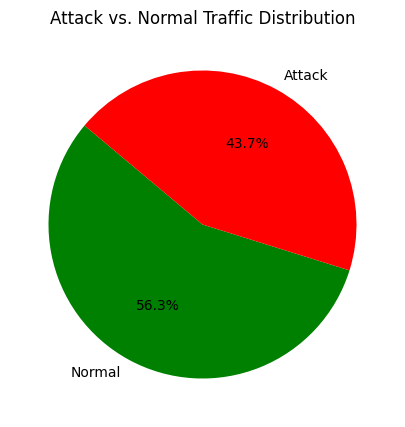

In [39]:
# Visualization
plt.figure(figsize=(7, 5))
plt.pie(data_values, labels=data_labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title("Attack vs. Normal Traffic Distribution")
plt.show()

In [40]:
# Count occurrences of each attack type
attack_counts = test_df['labels'].value_counts()

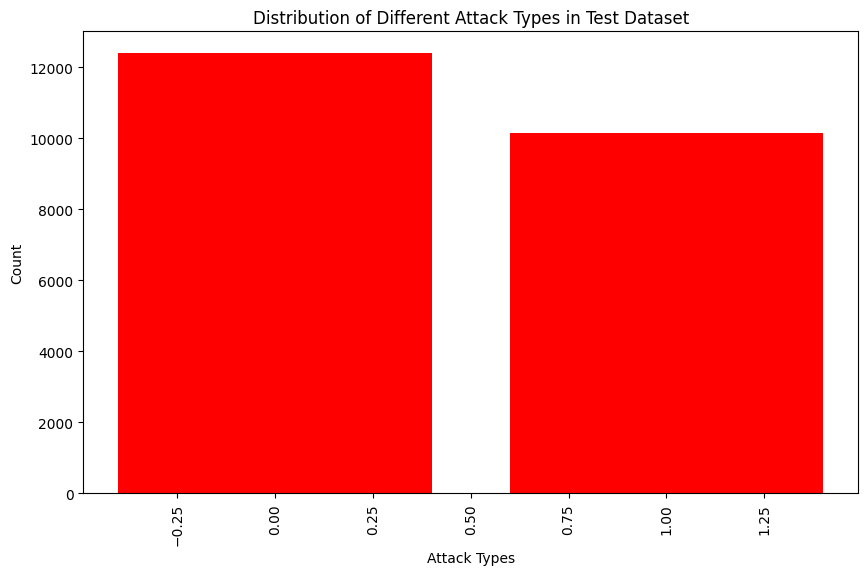

In [41]:
# Visualization of attack distribution
plt.figure(figsize=(10, 6))
plt.bar(attack_counts.index, attack_counts.values, color='red')
plt.xlabel("Attack Types")
plt.ylabel("Count")
plt.title("Distribution of Different Attack Types in Test Dataset")
plt.xticks(rotation=90)
plt.show()
